# Plotting con Python

La realización de gráficas es una parte fundamental en Data Science. Los seres humanos somos seres visuales, y una gráfica puede ayudarnos a entender mejor los datos que estamos analizando. En este notebook vamos a ver cómo hacer gráficas con Python, utilizando las librerías `matplotlib` y `seaborn`.

![imagen](https://miro.medium.com/v2/resize:fit:950/1*BxTr23ZW6brtURoVtuorVQ.png)


Lo primero, **¿Por qué 2 librerías?**

`matplotlib` es una librería muy potente y flexible, pero a veces puede ser un poco complicada de usar. **`seaborn` es una librería construída sobre `matplotlib`** y que simplifica mucho la creación de gráficas. Por eso, en general, es más fácil hacer gráficas con `seaborn` que con `matplotlib`. `seaborn` tiene una sintaxis más "pythónica" y más fácil de entender.

**¿Cómo se relacionan entre sí?**

`seaborn` es una librería de alto nivel que utiliza `matplotlib` para hacer las gráficas. Es decir, cuando haces una gráfica con `seaborn`, en realidad `seaborn` está utilizando `matplotlib` por debajo. Por eso, si quieres personalizar mucho una gráfica, puedes utilizar `matplotlib` directamente.

## 1. Instalación

Para instalar `seaborn` y `matplotlib`, puedes hacerlo con `pip`:

```bash
pip install seaborn==<version> matplotlib==<version>
```

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Figures y Axes

Las dos estructuras fundamentales en `matplotlib` son las `Figures` y los `Axes`.

- **Figure**: Es el contenedor principal de la gráfica o gráficas. Puede contener uno o varios `Axes`. Imaginalo como un canvas en el que vas a pintar tu gráfica.
- **Axes**: Cada una de las gráficas que componen el canvas. Es donde "se dibujan" los datos. Una `Figure` puede tener varios `Axes`.

![figures](https://miro.medium.com/v2/resize:fit:2000/1*CANkzqegZcHv9znE1U4s7A.png)

### 2.1 Crear una Figure

Para crear una `Figure`, simplemente utilizamos la función `plt.figure()` de `matplotlib`.

In [2]:
fig = plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

### 2.2 Crear un Axes

Para crear un `Axes`, utilizamos la función `fig.add_subplot()`. Esta función recibe 3 parámetros:

- **nrows**: Número de filas de la rejilla de `Axes`.
- **ncols**: Número de columnas de la grilla de `Axes`.
- **index**: Índice del `Axes` que queremos crear.

👇 Este código se lee de la siguiente forma: 

Si divides la figura en una **rejilla de 2 filas y 3 columnas**, el siguiente **gráfico** que se añada **se ubicará en la primera posición**. Es decir, en la **esquina superior izquierda.** La numeración de las posiciones de la rejilla es de izquierda a derecha
y de arriba a abajo.

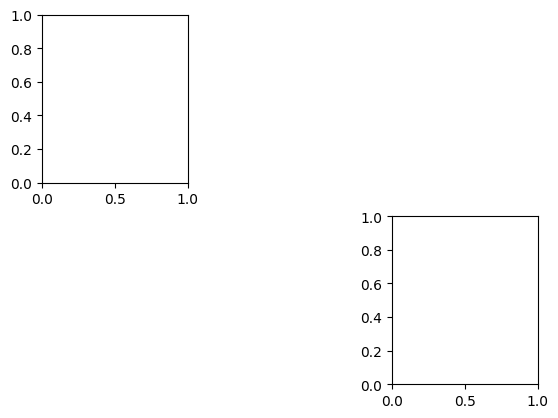

In [3]:
fig = plt.figure()  # en cada celda necesitamos una figura nueva
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 6)

# 💡 importante, matplotlib automáticamente no muestra los ejes no creados

### 2.3 Crear la Figure y los Axes a la vez

En `matplotlib` existen (por desgracia 😅) múltiples formas de crear `figures` y `axes`, incluso al mismo tiempo, algunas de las otras formas por las que puedes crear una `figura` y uno o varios `axes` son las siguientes:

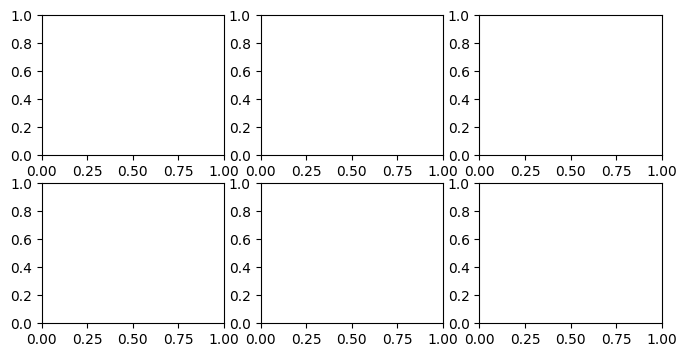

In [4]:
# Crea una figura con 6 subgráficos alineados en 2 filas y 3 columnas

fig, axes = plt.subplots(2, 3, figsize=(8, 4))

Crea un axes en una figura vacía con `plt.subplot()`. Esta función devuelve un `ax` y una `figure`, pero la `figure` no se devuelve explícitamente. **Esta función es útil si solo necesitas un `axes`**.

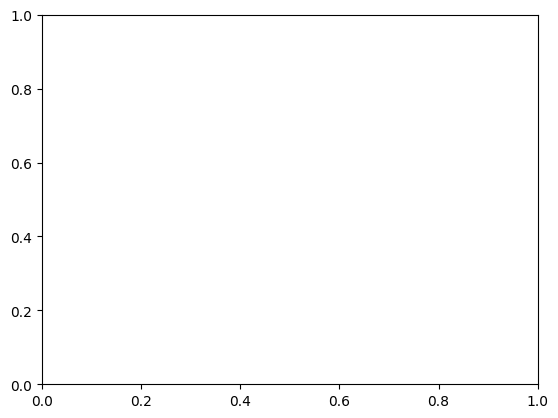

In [5]:
ax = plt.subplot()

### 2.4 Guardar una gráfica

Para guardar una gráfica en un archivo, utilizamos la función `plt.savefig()`. Esta función recibe un parámetro obligatorio, que es el nombre del archivo en el que queremos guardar la gráfica. Además, podemos pasarle otros parámetros opcionales, como el tamaño de la gráfica o la calidad de la imagen.

In [6]:
plt.savefig('output.png')

<Figure size 640x480 with 0 Axes>

## 3. Personalizacíon de las gráficas

Normalmente a las gráficas queremos añadirles información adicional, como títulos, etiquetas en los ejes, leyendas, etc. En `matplotlib` y `seaborn` hay muchas formas de hacer esto, pero aquí te dejo algunas de las más comunes:

- **Título de la gráfica**: `plt.title()`
- **Etiqueta del eje x**: `plt.xlabel()`
- **Etiqueta del eje y**: `plt.ylabel()`

Text(0, 0.5, 'Eje Y')

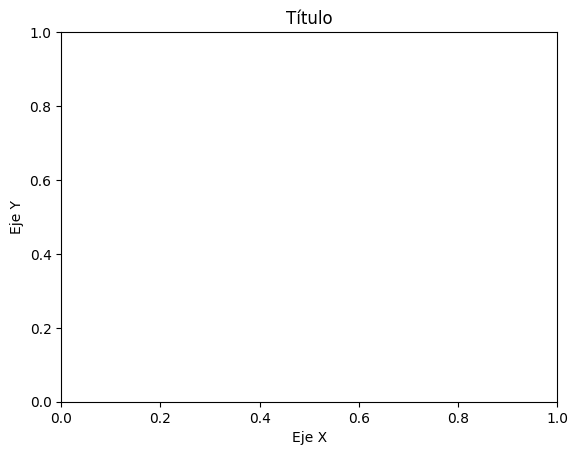

In [7]:
ax = plt.subplot()

ax.set_title('Título')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

`seaborn` cuenta con distintos estilos de gráficos, los cuales pueden ser aplicados con la función `set_style()`. Los estilos disponibles son: `whitegrid`, `darkgrid`, `white`, `dark`, y `ticks`.

In [8]:
sns.set_style('whitegrid')

## 4. Gráficas Básicas

Vamos a ver cómo crear algunas de las gráficas más comunes con `seaborn`.

Para apoyarnos en la creación de gráficas, vamos a utilizar un dataset de juguete que viene con `seaborn` llamado `tips`. Este dataset contiene información sobre propinas en un restaurante.

In [9]:
tips_dataset = sns.load_dataset('tips')
tips_dataset.head()  # Es un DataFrame de pandas 🐼

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 4.1 Gráficas de línea

Las gráficas de línea son muy útiles para visualizar la **evolución de una variable a lo largo del tiempo**. Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar una gráfica de línea para ver cómo han evolucionado las ventas a lo largo de los años.

Para crear una gráfica de línea con `seaborn`, utilizamos la función `sns.lineplot()`. Esta función recibe los siguientes parámetros:

- **x**: Valores del eje x: puede ser el nombre de una columna de un DataFrame o una lista de valores.
- **y**: Valores del eje y: puede ser el nombre d euna columna de un DataFrame o una lista de valores.
- **data**: DataFrame que contiene los datos.

<Axes: xlabel='time', ylabel='total_bill'>

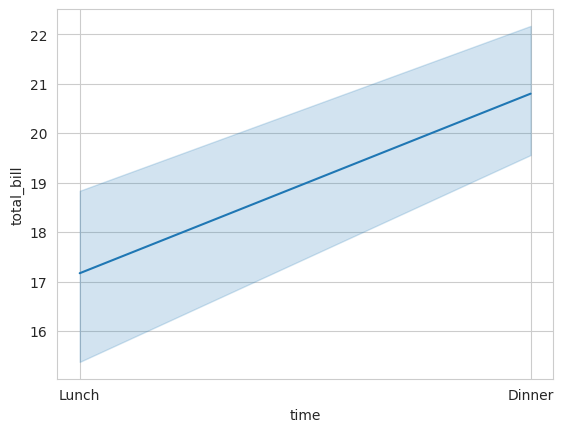

In [10]:
sns.lineplot(x="time", y="total_bill", data=tips_dataset)

💡 `seaborn` gestiona la creación del `ax` por debajo, simplificando el código, aun así es posible pasarle un `ax` personalizado por parámetro.

<Axes: xlabel='time', ylabel='total_bill'>

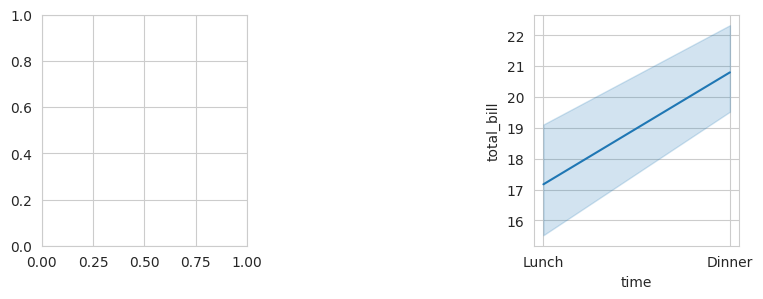

In [11]:
fig = plt.figure(figsize=(9, 3))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 3)

sns.lineplot(x="time", y="total_bill", data=tips_dataset, ax=ax2)

Hay un cuarto parámetro, `hue`, que nos permite añadir una tercera dimensión a la gráfica. Por ejemplo, si queremos ver cómo ha evolucionado la propina en función del día de la semana, podemos utilizar `hue="day"`.

<Axes: xlabel='time', ylabel='total_bill'>

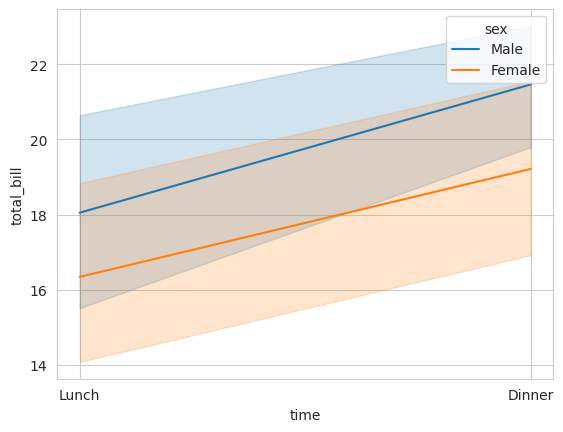

In [12]:
sns.lineplot(x="time", y="total_bill", hue="sex", data=tips_dataset)

### 4.2 Gráficas de barras

Las gráficas de barras son muy útiles para visualizar la **comparación de una variable categórica con una variable numérica** (o variable contínua). Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar una gráfica de barras para ver cuánto ha vendido cada empleado.

Para crear una gráfica de barras con `seaborn`, utilizamos la función `sns.barplot()`.

<Axes: xlabel='day', ylabel='total_bill'>

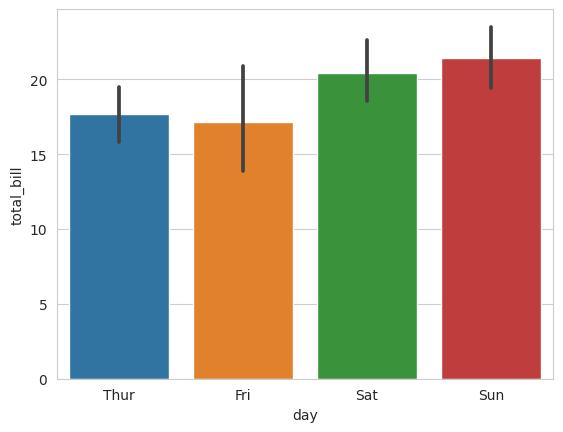

In [13]:
sns.barplot(x="day", y="total_bill", data=tips_dataset)

### 4.3 Gráficas de puntos

Las gráficas de puntos son muy útiles para visualizar la **relación entre dos variables numéricas**. Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar una gráfica de puntos para ver si hay alguna relación entre el número de visitas a la web de un cliente y las ventas que efectúa.

Para crear una gráfica de puntos con `seaborn`, utilizamos la función `sns.scatterplot()`.

<Axes: xlabel='total_bill', ylabel='tip'>

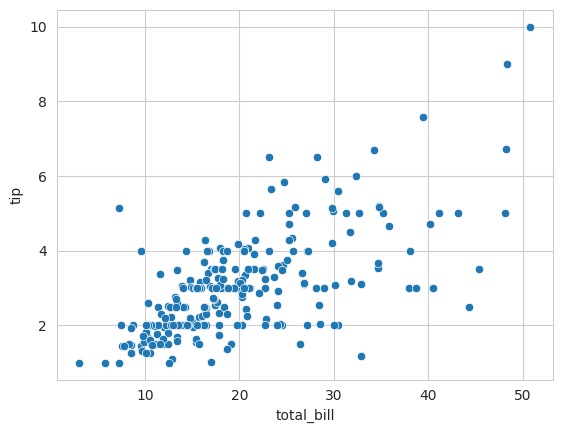

In [14]:
sns.scatterplot(x="total_bill", y="tip", data=tips_dataset)

💡 Igualmente podemos añadir una tercera dimensión a la gráfica con el parámetro `hue`.

<Axes: xlabel='total_bill', ylabel='tip'>

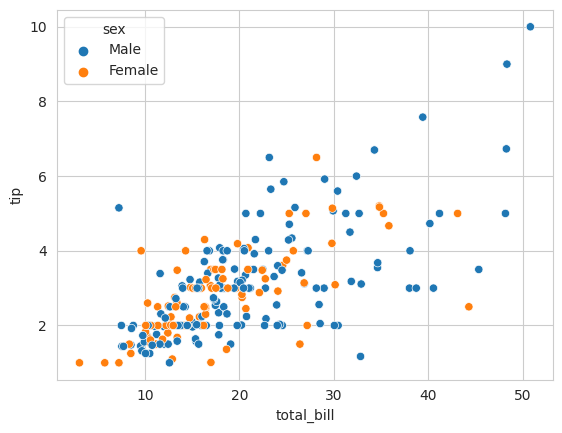

In [15]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips_dataset)

### 4.4 Histogramas

Los histogramas son muy útiles para visualizar la **distribución de una variable numérica**. Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar un histograma para ver cómo se distribuyen las ventas.

Para crear un histograma con `seaborn`, utilizamos la función `sns.histplot()`.

<Axes: xlabel='total_bill', ylabel='Count'>

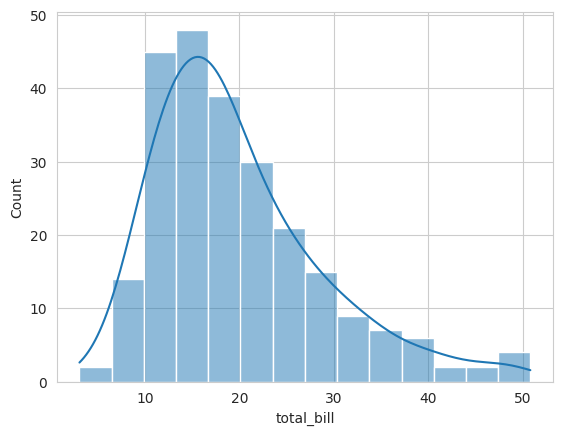

In [16]:
sns.histplot(x="total_bill", data=tips_dataset, kde=True)

### 4.5 Gráficos de Pares

Los gráficos de pares son una forma eficaz de visualizar las relaciones entre múltiples variables numéricas. Es muy útil para identificar patrones y correlaciones en los datos en una primera inspección.

Seaborn proporciona la función `pairplot()` para crear gráficos de pares, que muestran la relación entre todas las variables numéricas en un DataFrame.

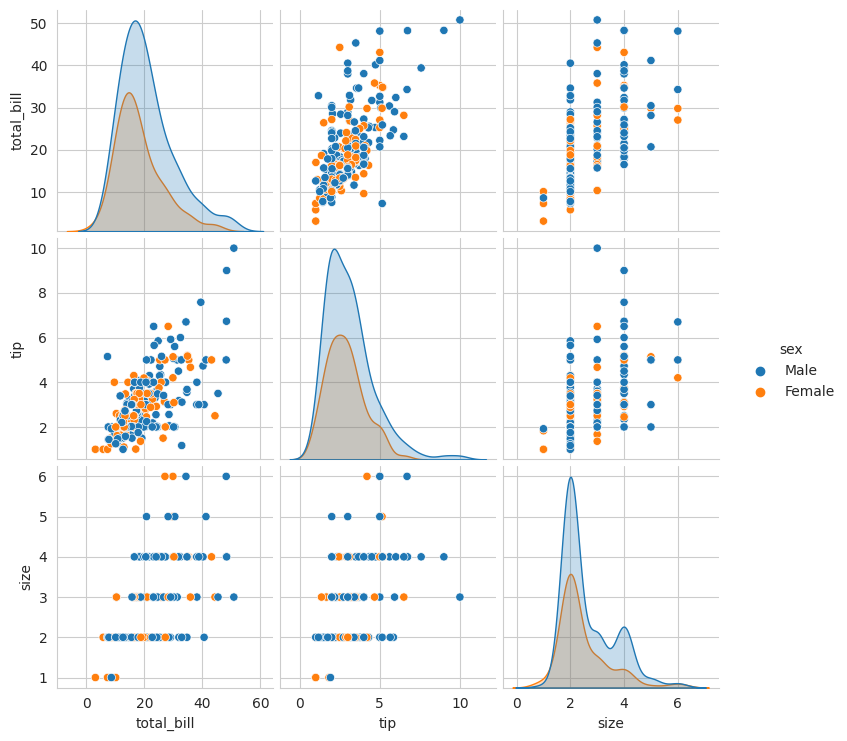

In [17]:
sns.pairplot(tips_dataset, hue="sex")

### 4.6 Mapas de Calor

Los mapas de calor son una forma efectiva de visualizar la **relación entre dos variables categóricas**. Esta gráfica es muy útil para analizar el resultado del entrenamiento de un modelo de clasificación, ya que permite identificar fácilmente las clases que se confunden con más frecuencia.

Seaborn proporciona la función `heatmap()` para crear mapas de calor, que muestran la relación entre dos variables categóricas en un DataFrame.

<Axes: >

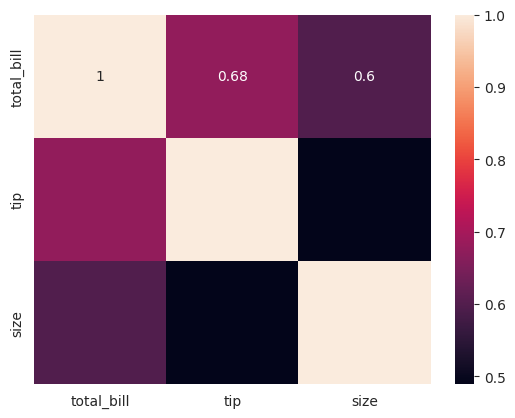

In [18]:
numerical_vars_df = tips_dataset[['total_bill', 'tip', 'size']]
sns.heatmap(data=numerical_vars_df.corr(), annot=True)


### 4.7 Diagramas de Violín

Los diagramas de violín son una forma efectiva de visualizar la **distribución de una variable numérica** en función de una variable categórica. Seaborn proporciona la función `violinplot()` para crear diagramas de violín, que muestran la distribución de una variable numérica en función de una variable categórica en un DataFrame.





<Axes: xlabel='day', ylabel='total_bill'>

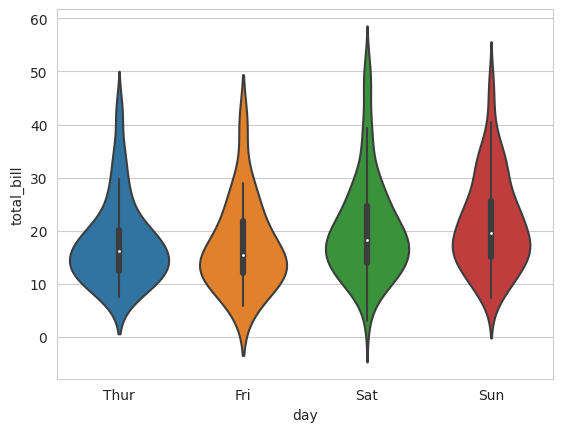

In [19]:
sns.violinplot(data=tips_dataset, x="day", y="total_bill")

### 4.8 Gráficas de conteo

Los gráficos de conteo son una forma efectiva de visualizar la **distribución de una variable categórica**. Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar un gráfico de conteo para ver cuántas ventas ha realizado cada empleado.

Seaborn proporciona la función `countplot()` para crear gráficos de conteo, que muestran la distribución de una variable categórica en un DataFrame.

<Axes: xlabel='day', ylabel='count'>

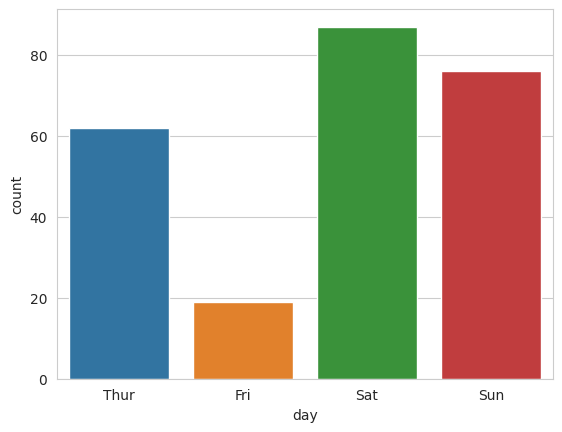

In [20]:
sns.countplot(x="day", data=tips_dataset)

### 4.9 Gráficas de Caja

Las gráficas de caja son una forma efectiva de visualizar la **distribución de una variable numérica**. Por ejemplo, si tienes datos de ventas de una empresa, puedes utilizar una gráfica de caja para ver cómo se distribuyen las ventas.

Seaborn proporciona la función `boxplot()` para crear gráficas de caja, que muestran la distribución de una variable numérica en un DataFrame.

<Axes: xlabel='day', ylabel='total_bill'>

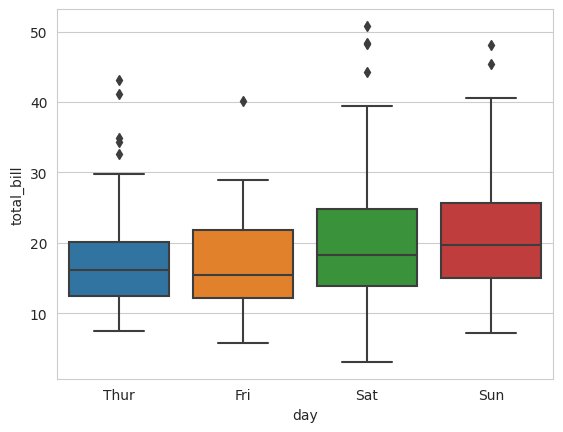

In [21]:
sns.boxplot(x="day", y="total_bill", data=tips_dataset)

# 5. Ejercicios

Carga el dataset tips usando Seaborn y muestra las primeras 5 filas.

Crea un gráfico de dispersión (`scatterplot`) de las columnas `total_bill` y `tip`.

Crea un histograma de la columna `total_bill`.


Crea un gráfico de barras que muestre la cantidad de propinas por día.

Crea un que muestre la relación entre el número de comensales y la propina.


Crea un gráfico de dispersión de `total_bill` y `tip`, añadiendo un título, y etiquetas a los ejes x e y.


Crea un gráfico de líneas de `total_bill` y `tip` con una línea discontinua y marcadores en forma de círculo.

Crea una figura con dos subplots: uno con un histograma de `total_bill` y otro con un histograma de `tip`.

Guarda un gráfico de dispersión de `total_bill` y `tip` como "scatter_plot.png".

## BONUS: Los Taxis de Nueva York

Vamos a trabajar con un dataset real: el dataset de los taxis de Nueva York. Este dataset contiene información sobre los viajes en taxi en Nueva York, como la fecha y hora del viaje, la duración del viaje, la distancia recorrida, etc.

Carga el dataset de los taxis de Nueva York y muestra las primeras 5 filas.

In [22]:
taxis_df = sns.load_dataset("taxis")
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Responde a las siguientes preguntas:

- ¿Cómo se distribuyen las distancias de los viajes?
- ¿Cuál es la relación entre la distancia del viaje y la tarifa?
- ¿Cuál es el promedio de las propinas por cada zona de recogida?
- ¿Cuál es la cantidad de pasajeros por barrio (borough) de recogida?
- ¿Hay alguna relación entre el número de pasajeros y la tarifa total? 
- ¿Qué métodos de pago (payment) son los más comunes? 
- ¿Cómo varían las tarifas según el barrio de recogida?
- ¿Qué método de pago recibe las mayores propinas?
- ¿Hay diferencias en las tarifas totales dependiendo del color del taxi?
- ¿Cuánto se paga en peajes según el borough de destino?
- ¿Cuál es la distancia media de los viajes según el borough de destino ? 